In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
import seaborn as sn

In [2]:
korea_df = pd.read_excel('korea_data.xlsx')
korea_df.shape

(49, 11)

In [3]:
korea_df.columns

Index(['Year', 'GDP growth (annual %)', 'Gross capital formation (% of GDP)',
       'Population growth (annual %)', 'Birth rate, crude (per 1,000 people)',
       'Broad money growth (annual %)',
       'Final consumption expenditure (annual % growth)',
       'General government final consumption expenditure (annual % growth)',
       'Gross capital formation (annual % growth)',
       'Households and NPISHs Final consumption expenditure (annual % growth)',
       'Unemployment, total (% of total labor force) (national estimate)'],
      dtype='object')

In [4]:
korea_df.head(2)

,Year,GDP growth (annual %),Gross capital formation (% of GDP),Population growth (annual %),"Birth rate, crude (per 1,000 people)",Broad money growth (annual %),Final consumption expenditure (annual % growth),General government final consumption expenditure (annual % growth),Gross capital formation (annual % growth),Households and NPISHs Final consumption expenditure (annual % growth),"Unemployment, total (% of total labor force) (national estimate)"
0,1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.86
1,1970,9.997407,26.338200,2.184174,31.2,27.422864,10.161539,7.279573,0.058667,10.557300,4.51


The file contains some empty values which appear as ..
We need to replace all the .. values with nan

In [5]:
korea_df = korea_df.replace('..', 'nan')


In [6]:
korea_df.index = korea_df['Year']

In [7]:
korea_df = korea_df.drop('Year', axis = 1)
korea_df.head(3)

,GDP growth (annual %),Gross capital formation (% of GDP),Population growth (annual %),"Birth rate, crude (per 1,000 people)",Broad money growth (annual %),Final consumption expenditure (annual % growth),General government final consumption expenditure (annual % growth),Gross capital formation (annual % growth),Households and NPISHs Final consumption expenditure (annual % growth),"Unemployment, total (% of total labor force) (national estimate)"
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.86
1970,9.997407,26.338200,2.184174,31.2,27.422864,10.161539,7.279573,0.058667,10.557300,4.51
1971,10.454693,25.558501,1.971324,31.2,20.844481,9.330434,8.610547,15.172870,9.426969,4.57


change the datatype of the whole dataset to a float

korea_df = korea_df.astype(float)

In [8]:
korea_df = korea_df.astype(float)

In [9]:
korea_df = korea_df.loc['1969':'2016']
korea_df.tail(3)

,GDP growth (annual %),Gross capital formation (% of GDP),Population growth (annual %),"Birth rate, crude (per 1,000 people)",Broad money growth (annual %),Final consumption expenditure (annual % growth),General government final consumption expenditure (annual % growth),Gross capital formation (annual % growth),Households and NPISHs Final consumption expenditure (annual % growth),"Unemployment, total (% of total labor force) (national estimate)"
Year,,,,,,,,,,
2014,3.341448,29.276910,0.628150,8.6,8.144493,2.042800,3.046199,5.262495,1.747117,3.5
2015,2.790236,28.918112,0.527288,8.6,8.190748,2.385188,2.988499,7.297390,2.203974,3.6
2016,2.929305,29.252387,0.451318,7.9,7.123156,2.981150,4.477185,5.610214,2.525765,3.7


In [10]:
# Renaming the column names to smaller values using key value pairs
# column_names = {'Unemployment, total (% of total labor force) (national estimate)':'unemployment',
#                 'GDP growth (annual %)': 'gdp_growth',
#                 'Gross capital formation (% of GDP)':'gross_capital_formation',
#                 'Population growth (annual %)':'pop_growth', 
#                 'Birth rate, crude (per 1,000 people)':'birth_rate',
#                 'Broad money growth (annual %)':'broad_money_growth',                
#                 'Final consumption expenditure (% of GDP)':'final_consum_gdp',
#                 'Final consumption expenditure (annual % growth)':'final_consum_growth',
#                 'General government final consumption expenditure (annual % growth)':'gov_final_consum_growth',
#                 'Gross capital formation (annual % growth)':'gross_cap_form_growth',
#                 'Households and NPISHs Final consumption expenditure (annual % growth)':'hh_consum_growth'}

# #rename columns
# korea_df = korea_df.rename(columns = column_names)
# print('='*100)
# display(korea_df.isnull().any())

print('='*100)
display(korea_df.head())

,GDP growth (annual %),Gross capital formation (% of GDP),Population growth (annual %),"Birth rate, crude (per 1,000 people)",Broad money growth (annual %),Final consumption expenditure (annual % growth),General government final consumption expenditure (annual % growth),Gross capital formation (annual % growth),Households and NPISHs Final consumption expenditure (annual % growth),"Unemployment, total (% of total labor force) (national estimate)"
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.86
1970,9.997407,26.338200,2.184174,31.200,27.422864,10.161539,7.279573,0.058667,10.557300,4.51
1971,10.454693,25.558501,1.971324,31.200,20.844481,9.330434,8.610547,15.172870,9.426969,4.57
1972,7.150715,21.404761,1.875999,28.400,33.815028,5.788458,8.134824,-13.056701,5.471355,4.59
1973,14.827554,25.872858,1.768293,28.300,36.415629,8.089952,2.287729,32.098276,8.927295,4.04


,GDP growth (annual %),Gross capital formation (% of GDP),Population growth (annual %),"Birth rate, crude (per 1,000 people)",Broad money growth (annual %),Final consumption expenditure (annual % growth),General government final consumption expenditure (annual % growth),Gross capital formation (annual % growth),Households and NPISHs Final consumption expenditure (annual % growth),"Unemployment, total (% of total labor force) (national estimate)"
GDP growth (annual %),1.000000,0.086712,0.567216,0.553225,0.335249,0.855835,0.098183,0.825496,0.868848,-0.160783
Gross capital formation (% of GDP),0.086712,1.000000,-0.215243,-0.241668,-0.163803,0.266617,0.118075,0.187885,0.268592,-0.618524
Population growth (annual %),0.567216,-0.215243,1.000000,0.978754,0.548336,0.470449,0.357042,0.317556,0.442187,0.279486
"Birth rate, crude (per 1,000 people)",0.553225,-0.241668,0.978754,1.000000,0.530563,0.458319,0.370517,0.305254,0.428266,0.313783
Broad money growth (annual %),0.335249,-0.163803,0.548336,0.530563,1.000000,0.290507,0.287270,0.235561,0.267220,0.336335
Final consumption expenditure (annual % growth),0.855835,0.266617,0.470449,0.458319,0.290507,1.000000,0.323250,0.700392,0.993526,-0.299310
General government final consumption expenditure (annual % growth),0.098183,0.118075,0.357042,0.370517,0.287270,0.323250,1.000000,0.033376,0.216641,0.007940
Gross capital formation (annual % growth),0.825496,0.187885,0.317556,0.305254,0.235561,0.700392,0.033376,1.000000,0.715021,-0.207261
Households and NPISHs Final consumption expenditure (annual % growth),0.868848,0.268592,0.442187,0.428266,0.267220,0.993526,0.216641,0.715021,1.000000,-0.304797
"Unemployment, total (% of total labor force) (national estimate)",-0.160783,-0.618524,0.279486,0.313783,0.336335,-0.299310,0.007940,-0.207261,-0.304797,1.000000


<AxesSubplot:>

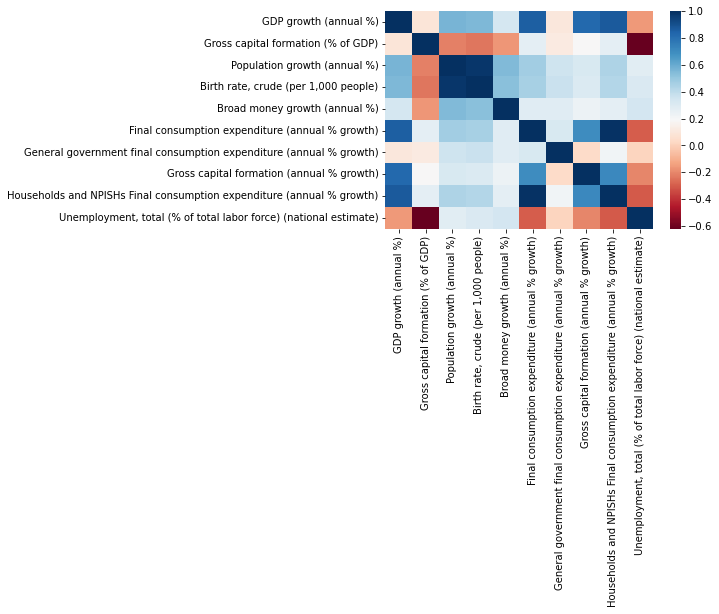

In [11]:
correlation = korea_df.corr()
display(correlation)

#plot the correlation on a heatmap
heatmp = sn.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, cmap = 'RdBu')
display(heatmp)

we need to determine how each variable in the data frame is contributing to the standard error.

<!-- For this we use the variance_inflation_factor

In [12]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

korea_df_before = korea_df

def calc_vif(x):
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return(vif)

In [25]:
display('-'*100)
print("Vif values before")
x = korea_df_before.iloc[:, :]
calc_vif(x)
# korea_df_before.info()

'----------------------------------------------------------------------------------------------------'

Vif values before


,variables,VIF
0,GDP growth (annual %),37.913516
1,Gross capital formation (% of GDP),16.716693
2,Population growth (annual %),135.902059
3,"Birth rate, crude (per 1,000 people)",178.598539
4,Broad money growth (annual %),4.795711
5,Final consumption expenditure (annual % growth),5690.345801
6,General government final consumption expenditu...,121.786911
7,Gross capital formation (annual % growth),5.304715
8,Households and NPISHs Final consumption expend...,4265.490934
9,"Unemployment, total (% of total labor force) (...",18.176169


In [41]:
display('-'*100)
print("Vif values after")
# drop columns with more than 5
korea_df_after = korea_df.drop(['GDP growth (annual %)','Gross capital formation (% of GDP)','Final consumption expenditure (annual % growth)','Households and NPISHs Final consumption expenditure (annual % growth)','Birth rate, crude (per 1,000 people)'], axis =1)
# korea_df_after.head(3)
x = korea_df_after.iloc[:, :]
calc_vif(x)


'----------------------------------------------------------------------------------------------------'

Vif values after


,variables,VIF
0,Population growth (annual %),9.236031
1,Broad money growth (annual %),4.505937
2,General government final consumption expenditu...,5.249112
3,Gross capital formation (annual % growth),1.755424
4,"Unemployment, total (% of total labor force) (...",6.794241


Heat map


<AxesSubplot:>

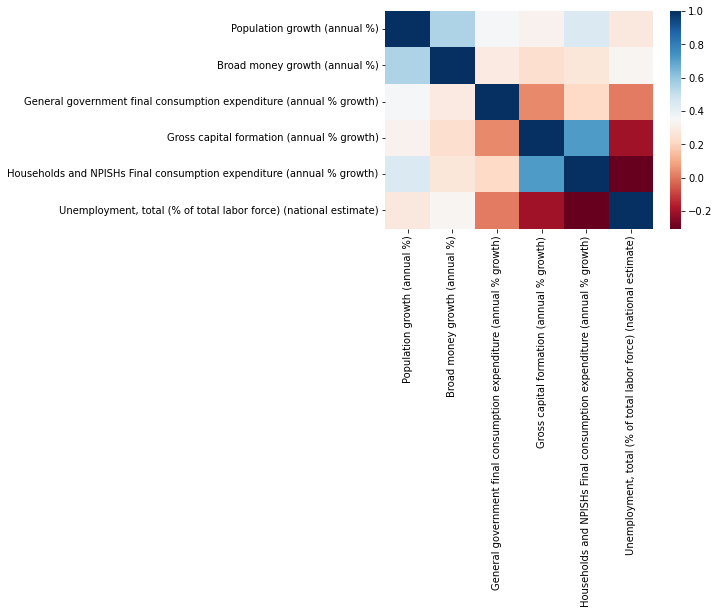

In [40]:
print("Heat map")
corr = korea_df_after.corr()
hmp = sn.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = 'RdBu' )
display(hmp)